In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv("bike_sharing.csv")
data = data.drop(columns="dteday")
data.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


C:\Users\INDIA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\INDIA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


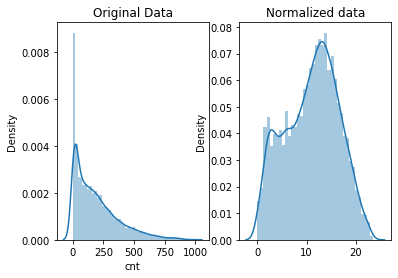

In [6]:
# now transforming feature variable
from scipy import stats
x_normalized_data = stats.boxcox(data["cnt"])
fig, ax=plt.subplots(1,2)
sns.distplot(data["cnt"], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(x_normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")
x_normalized_data = x_normalized_data[0].reshape(len(x_normalized_data[0]), 1)
data.cnt = x_normalized_data

In [7]:
x_data_set = np.array(data.drop(columns=['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'], axis=0))
y_data_set = np.array(pd.DataFrame(data.cnt))

In [8]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_data_set, y_data_set)

DecisionTreeRegressor(random_state=0)

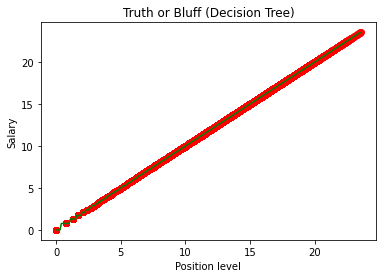

In [9]:
X_grid = np.arange(min(x_data_set), max(x_data_set), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(x_data_set, y_data_set, color ='red')
plt.plot(X_grid, regressor.predict(X_grid), color ='green')
plt.title('Truth or Bluff (Decision Tree)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()